In [ ]:
# Identifying Patterns and Trends in Campus Placement Data using Machine Learning

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics  import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/collegePlace.csv")

In [ ]:
df.shape

(2966, 8)

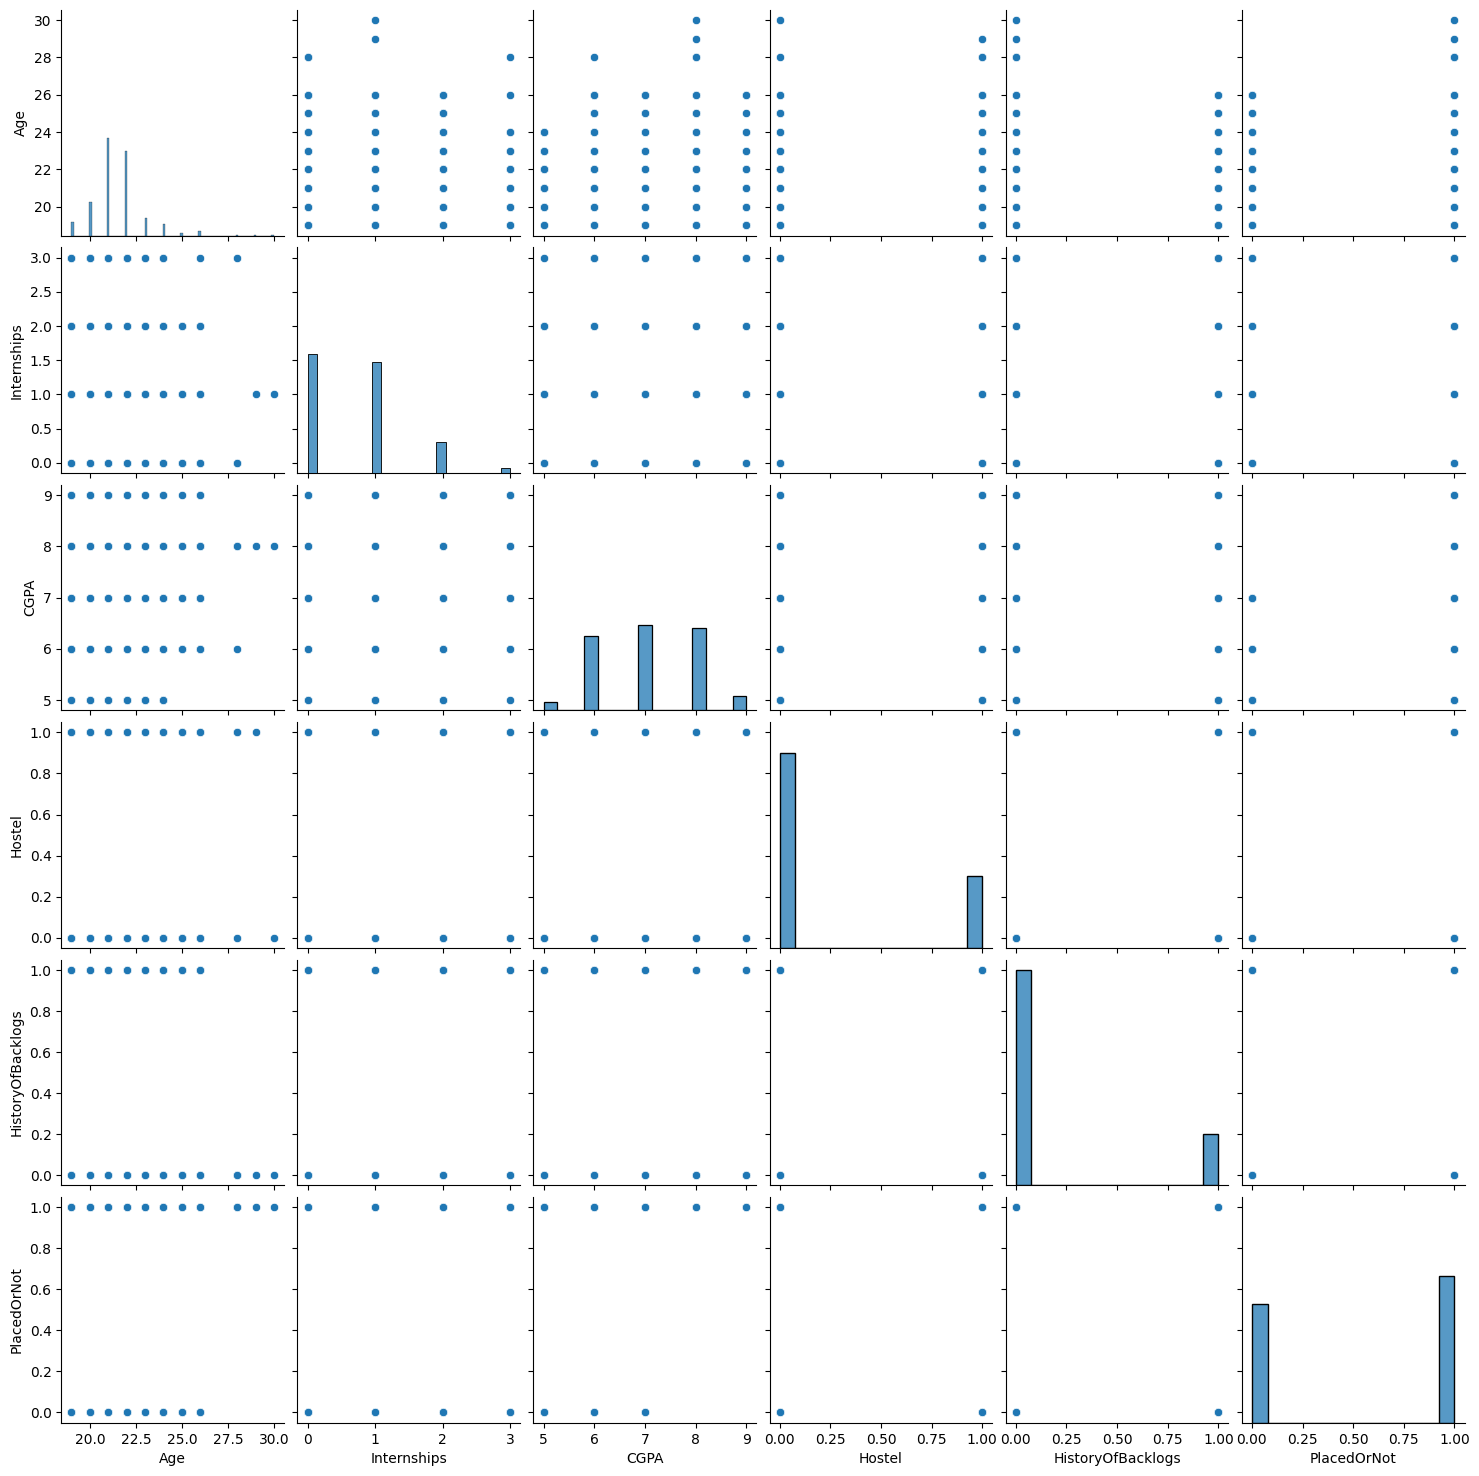

In [ ]:
sns.pairplot(df)

In [ ]:
corr = df.corr()

<ipython-input-6-45893e33df67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


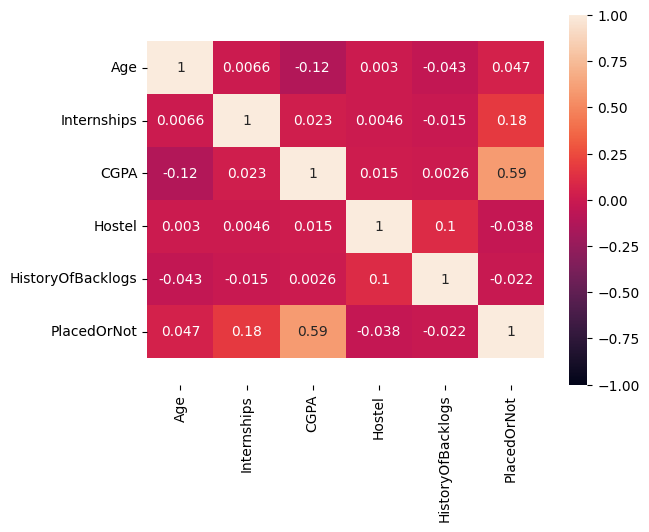

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,0.006552,-0.119787,0.003042,-0.042586,0.046943
Internships,0.006552,1.000000,0.023496,0.004617,-0.015118,0.179334
CGPA,-0.119787,0.023496,1.000000,0.014991,0.002576,0.588648
Hostel,0.003042,0.004617,0.014991,1.000000,0.103506,-0.038182
HistoryOfBacklogs,-0.042586,-0.015118,0.002576,0.103506,1.000000,-0.022337
PlacedOrNot,0.046943,0.179334,0.588648,-0.038182,-0.022337,1.000000


In [ ]:
ax = sns.heatmap(corr,vmin= -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax .set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

<ipython-input-9-f92659182652>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'],color='r')


<Axes: xlabel='CGPA', ylabel='Density'>

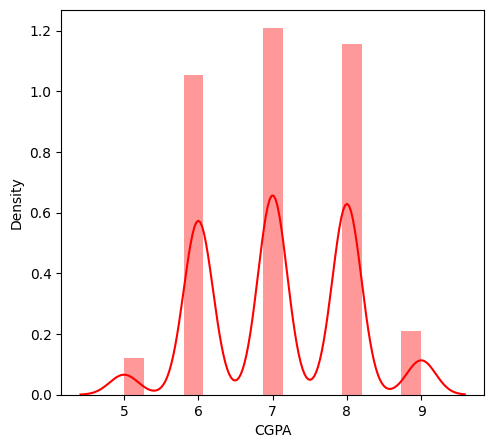

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['CGPA'],color='r')

<ipython-input-11-5e468beb8a0d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PlacedOrNot'],color='r')


<Axes: xlabel='PlacedOrNot', ylabel='Density'>

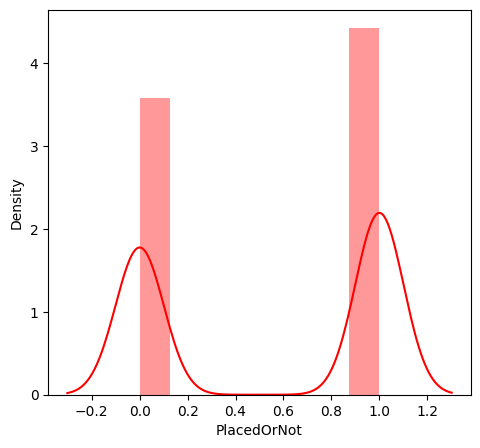

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['PlacedOrNot'],color='r')

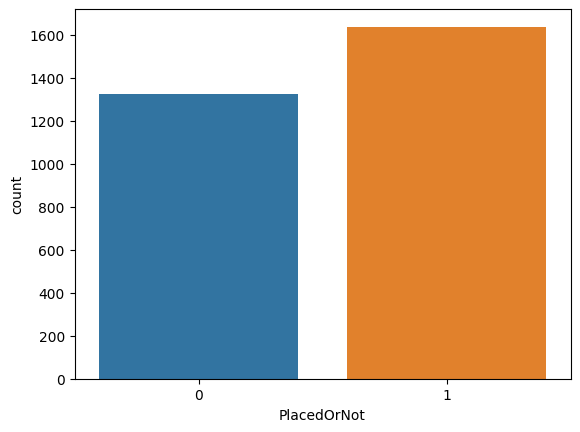

In [ ]:
from seaborn.widgets import color_palette
# setting the different color palette
color_palette = sns.color_palette("BuGn_r")
sns.countplot(x = "PlacedOrNot", data = df)
plt.show()
#as we can see data is not that imbalanced

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [ ]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [ ]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [ ]:
df['Gender'].value_counts()

Male      2475
Female     491
Name: Gender, dtype: int64

In [ ]:
df['Stream'].value_counts()

Computer Science                 776
Information Technology           691
Electronics And Communication    424
Mechanical                       424
Electrical                       334
Civil                            317
Name: Stream, dtype: int64

In [ ]:
df = df.replace(['Male'], [0])
df = df.replace(['Female'], [1])

In [ ]:
df = df.replace(['Computer Science', 'Information Technology','Electronics And Communication','Mechanical','Electrical','Civil'],
               [0,1,2,3,4,5,])

In [ ]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,0,2,1,8,1,1,1
1,21,1,0,0,7,1,1,1
2,22,1,1,1,6,0,0,1
3,21,0,1,0,8,0,1,1
4,22,0,3,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,0,1,0,7,0,0,0
2962,23,0,3,1,7,1,0,0
2963,22,0,1,1,7,0,0,0
2964,22,0,0,1,7,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                2966 non-null   int64
 1   Gender             2966 non-null   int64
 2   Stream             2966 non-null   int64
 3   Internships        2966 non-null   int64
 4   CGPA               2966 non-null   int64
 5   Hostel             2966 non-null   int64
 6   HistoryOfBacklogs  2966 non-null   int64
 7   PlacedOrNot        2966 non-null   int64
dtypes: int64(8)
memory usage: 185.5 KB


In [ ]:
def transformationplot(feature):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.distplot(feature)

<ipython-input-42-4e023cd5df85>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


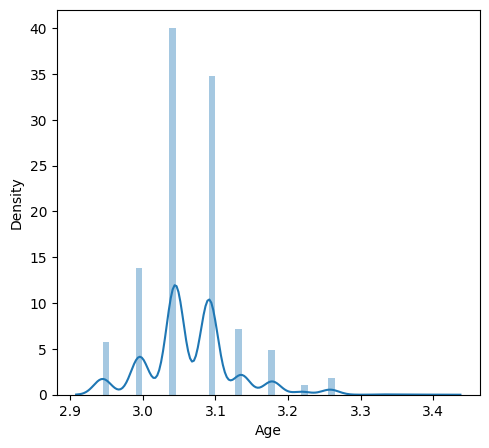

In [ ]:
transformationplot(np.log(df['Age']))

In [ ]:
# we are dropping the 'Hostel'column as it won't have much effect on our final output
df = df.drop(['Hostel'],axis=1)

In [ ]:
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,0,2,1,8,1,1
1,21,1,0,0,7,1,1
2,22,1,1,1,6,0,1
3,21,0,1,0,8,1,1
4,22,0,3,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,0,1,0,7,0,0
2962,23,0,3,1,7,0,0
2963,22,0,1,1,7,0,0
2964,22,0,0,1,7,0,0


In [ ]:
x = df.drop(columns='PlacedOrNot',axis=1)
y = df['PlacedOrNot']

In [ ]:
print(x)

      Age  Gender  Stream  Internships  CGPA  HistoryOfBacklogs
0      22       0       2            1     8                  1
1      21       1       0            0     7                  1
2      22       1       1            1     6                  0
3      21       0       1            0     8                  1
4      22       0       3            0     8                  0
...   ...     ...     ...          ...   ...                ...
2961   23       0       1            0     7                  0
2962   23       0       3            1     7                  0
2963   22       0       1            1     7                  0
2964   22       0       0            1     7                  0
2965   23       0       5            0     8                  0

[2966 rows x 6 columns]


In [ ]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(x)

StandardScaler()

In [ ]:
Standardized_data = scaler.transform(x)

In [ ]:
print(Standardized_data)

[[ 0.38813058 -0.44540301  0.04008175  0.40044544  0.95719068  2.05024603]
 [-0.36675158  2.24515772 -1.14874288 -0.95077319 -0.07631043  2.05024603]
 [ 0.38813058  2.24515772 -0.55433057  0.40044544 -1.10981154 -0.48774634]
 ...
 [ 0.38813058 -0.44540301 -0.55433057  0.40044544 -0.07631043 -0.48774634]
 [ 0.38813058 -0.44540301 -1.14874288  0.40044544 -0.07631043 -0.48774634]
 [ 1.14301273 -0.44540301  1.82331869 -0.95077319  0.95719068 -0.48774634]]


In [ ]:
x = Standardized_data
y = df['PlacedOrNot']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify=y, random_state=2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(2966, 6) (2372, 6) (594, 6)


In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
#testing accuracy
x_test_prediction = classifier.predict(x_test)
y_pred= accuracy_score(x_test_prediction, y_test)
y_pred

0.7794612794612794

In [ ]:
x_test

array([[-0.36675158,  2.24515772,  0.04008175,  1.75166407, -0.07631043,
        -0.48774634],
       [ 0.38813058, -0.44540301,  0.63449406, -0.95077319, -0.07631043,
        -0.48774634],
       [ 1.89789488, -0.44540301, -0.55433057,  0.40044544, -0.07631043,
        -0.48774634],
       ...,
       [-1.12163373, -0.44540301,  0.63449406,  0.40044544,  1.99069179,
        -0.48774634],
       [ 0.38813058, -0.44540301, -1.14874288,  0.40044544, -1.10981154,
        -0.48774634],
       [ 0.38813058,  2.24515772, -0.55433057,  0.40044544,  0.95719068,
        -0.48774634]])

In [ ]:
#training accuracy
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [ ]:
print('Accurancy score of the training data:',training_data_accuracy)

Accurancy score of the training data: 0.7685497470489039


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
best_k = {"Regular":0}
best_score = {"Regular":0}
for k in range(3,50,2):
  ## Using Regular training set
  knn_temp = KNeighborsClassifier(n_neighbors=k)
  knn_temp.fit(x_train, y_train)
  knn_temp_pred = knn_temp.predict(x_test)
  score = metrics.accuracy_score(y_test, knn_temp_pred) * 100
  if score >= best_score["Regular"] and score < 100:
    best_score["Regular"] = score
    best_k["Regular"] = k

In [ ]:
print("---Result---\nk: {}".format(best_k, best_score))
##Instantiate the models
knn = KNeighborsClassifier(n_neighbors=best_k["Regular"])
## Fit the model to the training set
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
testd = accuracy_score(knn_pred, y_test)

---Result---
k: {'Regular': 7}


In [ ]:
knn_pred


array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print('Accurancy score of the test data using KNN :', testd)

Accurancy score of the test data using KNN : 0.8619528619528619


In [ ]:
#checking the train accurancy
knn_pred_1 = knn.predict(x_train)
traind = accuracy_score(knn_pred_1, y_train)
traind

0.8882799325463744

In [ ]:
knn_pred_1

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
x_train.shape

(2372, 6)

In [ ]:
y_train.shape

(2372,)

In [ ]:
import tensorflow as tf
from tensorflow import  keras
from keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
classifier = Sequential()
#add input layer and first hidden layer 
classifier.add(keras.layers.Dense(6,activation = 'relu', input_dim =6 ))
classifier.add(keras.layers.Dropout(0.50))
#add 2nd hidden layer
classifier.add(keras.layers.Dense(6,activation = 'relu'))
classifier.add(keras.layers.Dropout(0.50))
#find or output layer
classifier.add(keras.layers.Dense(1,activation = 'sigmoid'))

In [ ]:
#compiling the model
loss_1 = tf.keras.losses.BinaryCrossentropy()
classifier.compile(optimizer = 'Adam', loss = loss_1,metrics=['accuracy'])

In [ ]:
#fitting the model
classifier.fit(x_train, y_train, batch_size=20,epochs=100)

Epoch 1/100
119/119 [==============================] - 1s 2ms/step - loss: 0.8801 - accuracy: 0.4970
Epoch 2/100
119/119 [==============================] - 0s 2ms/step - loss: 0.7641 - accuracy: 0.5308
Epoch 3/100
119/119 [==============================] - 0s 2ms/step - loss: 0.7195 - accuracy: 0.5662
Epoch 4/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5898
Epoch 5/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.6172
Epoch 6/100
119/119 [==============================] - 0s 3ms/step - loss: 0.6495 - accuracy: 0.6315
Epoch 7/100
119/119 [==============================] - 0s 3ms/step - loss: 0.6311 - accuracy: 0.6400
Epoch 8/100
119/119 [==============================] - 0s 3ms/step - loss: 0.6222 - accuracy: 0.6509
Epoch 9/100
119/119 [==============================] - 0s 3ms/step - loss: 0.6098 - accuracy: 0.6560
Epoch 10/100
119/119 [==============================] - 0s 3ms/step - loss: 0.5901 - accura

In [ ]:
# with the model fitted, we test the model on test data.use a threshold of 0.5,to turn data into True(Placed) and false(NotPlaced)
pred = classifier.predict(x_test)
pred = (pred > 0.5)
pred

19/19 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[236,  30],
       [ 68, 260]])

In [ ]:
import pickle
pickle.dump(knn,open("placement.pkl",'wb'))
model = pickle.load (open('placement.pkl','rb'))

In [ ]:
#input_data = (0.0,60.0,0.0,11.0,67349.0,0.0,0.0,0.0,1.0,3.0,44.0.1,14230.0,11.0,1.0,4461.0,2.0,0.0,3.0,0.0,18.0,1.0)
input_data = [[22,0,2,1,8,1]]
'''# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#standardize the input data
std_data = scalar.trandform(input_data_reshaped)
print(std_data)'''
prediction = knn.predict(input_data)
print(prediction)
if (prediction[0] == 0):
  print('not placed')
else:
    print('placed')

[1]
placed
